In [29]:
import pandas as pd
from scipy.stats import chisquare,chi2_contingency
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, time

n = 1
month = ['January', 'February', 'March', 'April', 'May', 'June']
payment_ny_global = {}
payment_borough_global = {}
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_zone = pd.read_csv('taxi_zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

while(n<7):
    csv_path = 'yellow_tripdata_2018-0'+str(n)+'.csv'

    df_taxi = pd.read_csv(csv_path, usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1')

    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.month == n]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.month <= n+1]
    df_taxi = df_taxi[df_taxi['payment_type'] >= 1]
    df_taxi = df_taxi[df_taxi['payment_type'] <= 6]
    df_taxi = df_taxi.dropna(subset=['payment_type'])

    df_join = pd.merge(df_taxi,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])
    
    del df_taxi

    df_payment = df_join[['Borough', 'payment_type']]
    payment_ny = df_payment.groupby('payment_type').count()
    payment_ny.columns = ['n_payments']
    
    payment_ny_global[month[n-1]] = payment_ny['n_payments'].to_dict()
    
    del payment_ny

    payment_borough = df_payment.groupby(['Borough','payment_type']).payment_type.count()
    
    del df_payment

    payment_borough = pd.DataFrame(payment_borough)
    payment_borough.columns = ['n_payments']
    
    payment_borough_global[month[n-1]] = payment_borough['n_payments'].to_dict()
    
    n += 1

In [5]:
chi2

14460.901173348751

In [6]:
p

0.0

In [7]:
dof

18

In [8]:
expected

array([[5.15037079e+03, 6.98705059e+04, 3.98005376e+02, 5.55213665e+06,
        3.67257892e+05, 1.00372634e+02, 1.10761202e+05],
       [2.19218737e+03, 2.97394589e+04, 1.69405736e+02, 2.36319371e+06,
        1.56318476e+05, 4.27222873e+01, 4.71440440e+04],
       [3.64442293e+01, 4.94406488e+02, 2.81630192e+00, 3.92871406e+04,
        2.59873150e+03, 7.10240765e-01, 7.83750684e+02],
       [9.99761608e+00, 1.35628777e+02, 7.72586112e-01, 1.07775018e+04,
        7.12900791e+02, 1.94837829e-01, 2.15003544e+02]])

In [30]:
result = {}
for i in payment_ny_global: 
    for j in payment_ny_global[i]: 
        if j not in result: 
            result[j] = payment_ny_global[i][j]
        else: 
            result[j] += payment_ny_global[i][j]
            
for i in result: 
    result[i] = result[i]//6

In [31]:
result

{1: 6261021, 2: 2665560, 3: 47553, 4: 12867}

Text(0.5,1,'Number of payments for each way of payments, New York - From January to June 2018')

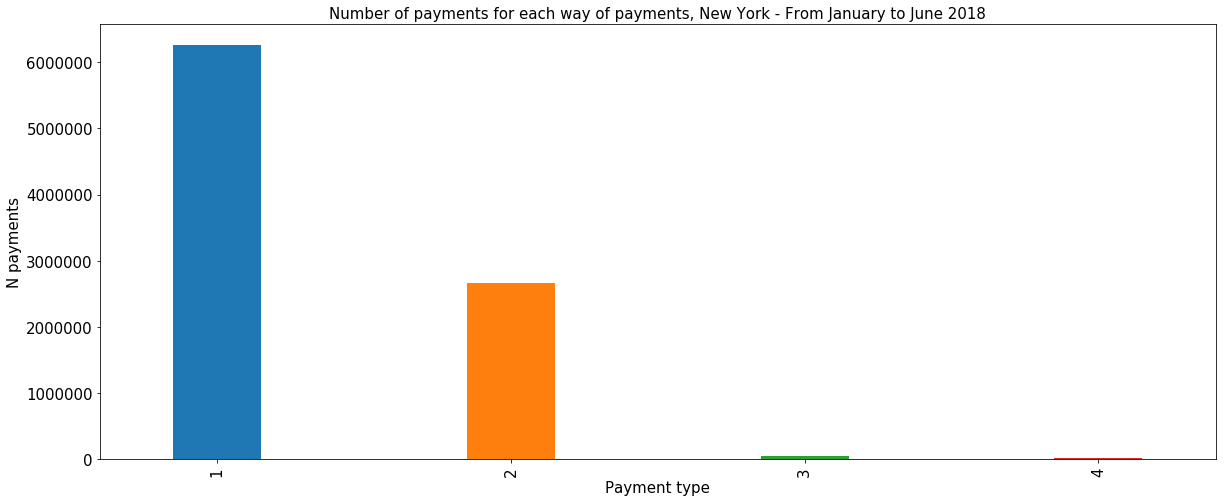

In [32]:
ax = pd.Series(result).plot(kind='bar',figsize=(20,8),legend=False, fontsize=15, width = 0.3)
ax.set_xlabel("Payment type",fontsize=15)
ax.set_ylabel("N payments",fontsize=15)
ax.set_title('Number of payments for each way of payments, New York - From January to June 2018', fontsize=15)

In [33]:
payment_borough_global

{'January': {('Bronx', 1): 2939,
  ('Bronx', 2): 4114,
  ('Bronx', 3): 271,
  ('Bronx', 4): 65,
  ('Brooklyn', 1): 63278,
  ('Brooklyn', 2): 35331,
  ('Brooklyn', 3): 1320,
  ('Brooklyn', 4): 311,
  ('EWR', 1): 439,
  ('EWR', 2): 88,
  ('EWR', 3): 33,
  ('EWR', 4): 11,
  ('Manhattan', 1): 5564623,
  ('Manhattan', 2): 2356770,
  ('Manhattan', 3): 34240,
  ('Manhattan', 4): 9762,
  ('Queens', 1): 365196,
  ('Queens', 2): 154697,
  ('Queens', 3): 5697,
  ('Queens', 4): 1298,
  ('Staten Island', 1): 69,
  ('Staten Island', 2): 65,
  ('Staten Island', 3): 9,
  ('Staten Island', 4): 1,
  ('Unknown', 1): 109131,
  ('Unknown', 2): 47735,
  ('Unknown', 3): 1634,
  ('Unknown', 4): 404},
 'February': {('Bronx', 1): 2691,
  ('Bronx', 2): 3595,
  ('Bronx', 3): 228,
  ('Bronx', 4): 52,
  ('Brooklyn', 1): 61096,
  ('Brooklyn', 2): 32512,
  ('Brooklyn', 3): 1211,
  ('Brooklyn', 4): 269,
  ('EWR', 1): 397,
  ('EWR', 2): 69,
  ('EWR', 3): 26,
  ('EWR', 4): 5,
  ('Manhattan', 1): 5490788,
  ('Manhattan',

In [49]:
result = {}
for i in payment_borough_global: 
    for j in payment_borough_global[i]: 
        if j not in result: 
            result[j] = payment_borough_global[i][j]
        else: 
            result[j] += payment_borough_global[i][j]
            
for i in result: 
    result[i] = result[i]//6

Text(0.5,1,'Number of payments for each way of payments and borough - From January to June 2018')

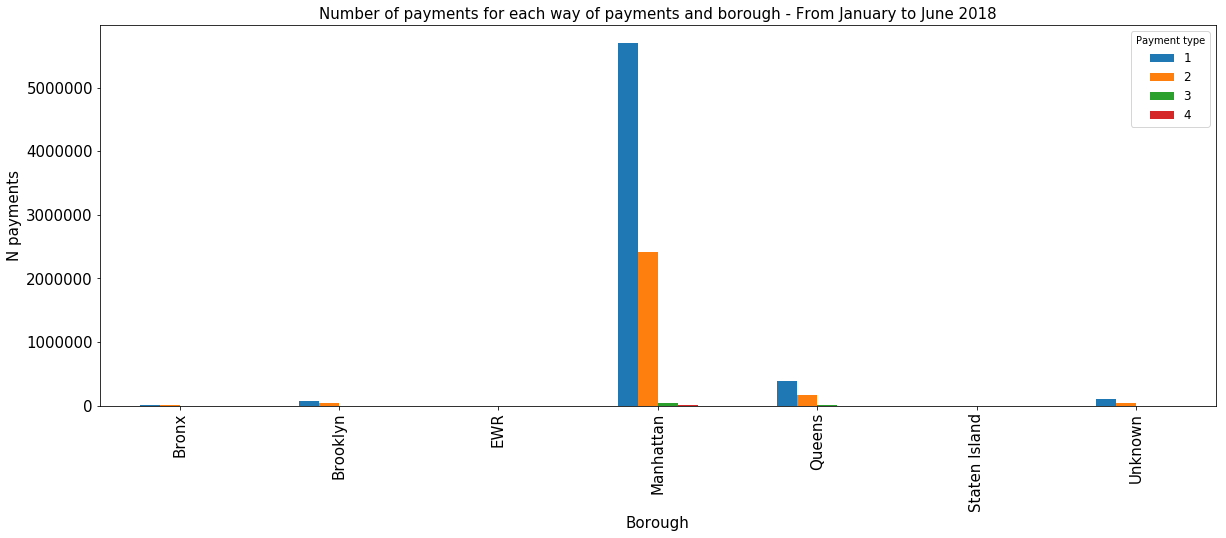

In [50]:
s = pd.Series(result)
ax = s.unstack().plot.bar(figsize =(20,7), fontsize = 15)
ax.set_xlabel("Borough",fontsize=15)
ax.set_ylabel("N payments",fontsize=15)
ax.legend(fontsize=12, title = "Payment type")
ax.set_title("Number of payments for each way of payments and borough - From January to June 2018", fontsize=15)

In [64]:
t = pd.DataFrame(pd.Series(result))
'''borough = list(t.index.levels[0])
payment = list(t.index.levels[1])
t = t.get_values()
borough_values = []
l=[t[0][0]]
for i in range(1, len(t)):
    l.append(t[i][0])
    if(len(l)==7):
        borough_values.append(l)
        l=[]

frame = pd.DataFrame(borough_values, columns=borough)

frame['payment_type'] = payment

frame = frame.set_index('payment_type')

chi2, p, dof, expected = chi2_contingency(frame)'''

"borough = list(t.index.levels[0])\npayment = list(t.index.levels[1])\nt = t.get_values()\nborough_values = []\nl=[t[0][0]]\nfor i in range(1, len(t)):\n    l.append(t[i][0])\n    if(len(l)==7):\n        borough_values.append(l)\n        l=[]\n\nframe = pd.DataFrame(borough_values, columns=borough)\n\nframe['payment_type'] = payment\n\nframe = frame.set_index('payment_type')\n\nchi2, p, dof, expected = chi2_contingency(frame)"

In [62]:
frame

,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
payment_type,,,,,,,
1,4631,4357,252,60,73642,38418,1464
2,320,506,91,36,7,5697766,2413236
3,37799,10602,385186,166769,6215,1489,72
4,53,8,2,99216,42633,1775,385


In [63]:
borough_values

[[4631, 4357, 252, 60, 73642, 38418, 1464],
 [320, 506, 91, 36, 7, 5697766, 2413236],
 [37799, 10602, 385186, 166769, 6215, 1489, 72],
 [53, 8, 2, 99216, 42633, 1775, 385]]

In [65]:
t

0
Bronx         1     4631
              2     4357
              3      252
              4       60
Brooklyn      1    73642
              2    38418
              3     1464
              4      320
EWR           1      506
              2       91
              3       36
              4        7
Manhattan     1  5697766
              2  2413236
              3    37799
              4    10602
Queens        1   385186
              2   166769
              3     6215
              4     1489
Staten Island 1       72
              2       53
              3        8
              4        2
Unknown       1    99216
              2    42633
              3     1775
              4      385